In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

savefig = False

In [2]:
def read_data(path,name):
    """
    Reads .xry file generated by the software X-ray Apparatus
    ---------------------------------------------------------
    Case  : plane (200) for a cubic lattice.
    Output: Counts-Rate (R)[1/s], 
            Glacing-Angle (beta)[degrees], 
          as a pandas DataFrame.
    """
    df = pd.read_csv(path+name)
    beta_min = float(df["XR01"][2].split(' ')[0])
    beta_max = float(df["XR01"][2].split(' ')[1])
    dbeta = float(df["XR01"][2].split(' ')[3])
    beta = np.linspace(beta_min,beta_max,int((beta_max-beta_min)/dbeta)+1)
    R = df["XR01"][13:13+len(beta)].str.replace("\t","").astype(float).values
    return (beta,R)

In [3]:
beta_LiF,R_LiF   = read_data("data/","LiF_sweep_def.xry")
beta_NaCl,R_NaCl = read_data("data/","NaCl_sweep_def.xry")

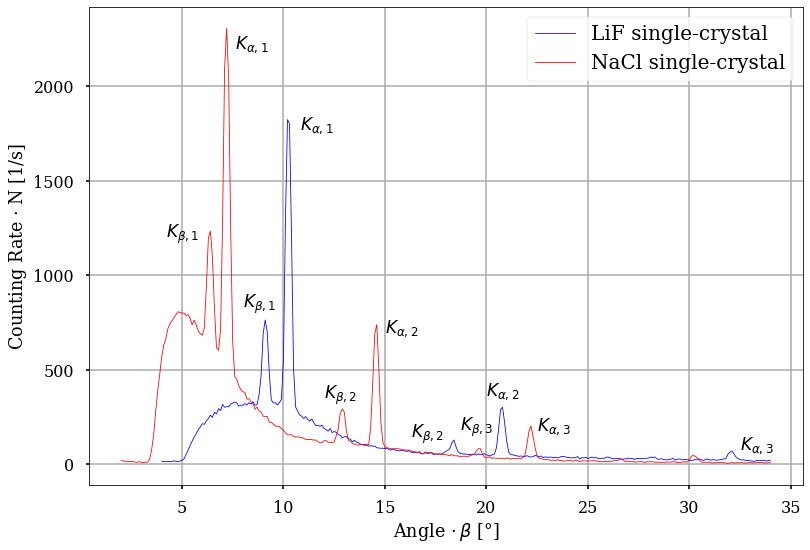

In [4]:
plt.plot(beta_LiF,R_LiF, label = "LiF single-crystal", color="blue", lw = 0.8)
plt.plot(beta_NaCl,R_NaCl, label = "NaCl single-crystal", color = "red", lw = 0.8)

# NaCl Tags
plt.text(7.6,2200, "$K_{\\alpha,1}$", fontsize=17)
plt.text(4.2,1200, "$K_{\\beta,1}$", fontsize=17)

plt.text(15,700, "$K_{\\alpha,2}$", fontsize=17)
plt.text(12,350, "$K_{\\beta,2}$", fontsize=17)

plt.text(22.5,180, "$K_{\\alpha,3}$", fontsize=17)
plt.text(18.7,180, "$K_{\\beta,3}$", fontsize=17)

# LiF Tags
plt.text(10.8,1770, "$K_{\\alpha,1}$", fontsize=17)
plt.text(8.0,830, "$K_{\\beta,1}$", fontsize=17)

plt.text(20,365, "$K_{\\alpha,2}$", fontsize=17)
plt.text(16.3,140, "$K_{\\beta,2}$", fontsize=17)

plt.text(32.5,80, "$K_{\\alpha,3}$", fontsize=17)

plt.xlabel("Angle $\\cdot\:\\beta $ [°]")
plt.ylabel("Counting Rate $\\cdot$ N [1/s]")

plt.legend(prop={'size': 20})
plt.grid()

if savefig == True:
    plt.savefig('images/bragg_diffraction_NaCl_LiF.pdf')

plt.show()